<a href="https://colab.research.google.com/github/AndrewCDownie/Classwork/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    #conv layers
    self.layer1 = nn.Sequential(
        nn.Conv2d( 1,  64,3,stride = 1,padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d( 64,128,3,stride = 1,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2)
    )

    self.layer3 = nn.Sequential(
        nn.Conv2d(128,256,3,stride = 1,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU()
    )

    self.layer4 = nn.Sequential(
        nn.Conv2d(256,256,3,stride = 1,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2)
    )


    self.layer5 = nn.Sequential(
        nn.Conv2d(256,512,3,stride = 1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU()
    )


    self.layer6 = nn.Sequential(
        nn.Conv2d(512,512,3,stride = 1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2)
    )


    self.layer7 = nn.Sequential(
        nn.Conv2d(512,512,3,stride = 1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU()
    )

    self.layer8 = nn.Sequential(
        nn.Conv2d(512,512,3,stride = 1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2)
      
    )
    #fully connected layers

    self.layer9 = nn.Sequential(
        nn.Linear(512,4096),
        nn.ReLU(),
        nn.Dropout2d(p = 0.5)
    )

    self.layer10 = nn.Sequential(
        nn.Linear(4096,4096),
        nn.ReLU(),
        nn.Dropout2d(p = 0.5)
    )

    self.layer11 = nn.Sequential(
        nn.Linear(4096,10)
    )

  def forward(self,x):
    x = self.layer1(x)

    x = self.layer2(x)

    x = self.layer3(x)

    x = self.layer4(x)

    x = self.layer5(x)

    x = self.layer6(x)

    x = self.layer7(x)

    x = self.layer8(x)

    x = x.view(-1, 512)
  
    x = self.layer9(x)

    x = self.layer10(x)

    x = self.layer11(x)

    return x

In [54]:
import torchvision
import os
batch_size_train = 256
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("/files/",train=True,download=True,transform = torchvision.transforms.Compose([torchvision.transforms.Resize((32,32), interpolation=2),torchvision.transforms.ToTensor()])),shuffle = False,batch_size = batch_size_train
)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("/files/",train=False,download=True,transform = torchvision.transforms.Compose([torchvision.transforms.Resize((32,32), interpolation=2),torchvision.transforms.ToTensor()])),batch_size = 1
)

In [44]:
import torch

if torch.cuda.is_available():
  print("GPU avalible")
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
  print("Using CPU")

GPU avalible


In [55]:
import torch.optim as optim
net = Net()
net.cuda()
optimizer = optim.SGD(net.parameters(),lr = 0.001)
#print(net)
loss = nn.CrossEntropyLoss()
i =1
epochs = 10
losses = []
lr = 0.001
epoch_loss = []
for i in range(epochs):
  net.train()
  train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("/files/",train=True,download=True,transform = torchvision.transforms.Compose([torchvision.transforms.Resize((32,32), interpolation=2),torchvision.transforms.ToTensor()])),shuffle = False,batch_size = batch_size_train
)
  for b_index,batch in enumerate(train_loader):
    batch_data = batch[0].to(device)
    target_data = batch[1].to(device)
    output = net(batch_data)
    
    error_loss = loss(output,target_data)
    net.zero_grad()
    error_loss.backward()
    optimizer.step()
    #print(error_loss)
    losses.append(error_loss.item())
    if b_index % 100 == 0:
      print("done:",b_index)
    if b_index +1> 1000:
      break
print(losses)

done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
done: 0
done: 100
done: 200
[2.309715509414673, 2.31058931350708, 2.315760374069214, 2.318561553955078, 2.302415132522583, 2.319204807281494, 2.328091859817505, 2.2985129356384277, 2.3128843307495117, 2.313605785369873, 2.275233745574951, 2.289191722869873, 2.3194892406463623, 2.263639211654663, 2.282362222671509, 2.293774127960205, 2.2638232707977295, 2.265547037124634, 2.277439594268799, 2.269667148590088, 2.2461447715759277, 2.2508816719055176, 2.2597298622131348, 2.245776414871216, 2.2525320053100586, 2.2569289207458496, 2.253325939178467, 2.2610816955566406, 2.2627980709075928, 2.237621545791626, 2.2449791431427, 2.2272164821624756, 2.2233517169952393, 2.2196929454803467, 2.221005916595459, 2.209667921066284, 2.2266602516174316, 2.21

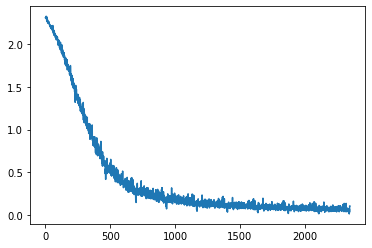

In [56]:
plt.plot(losses)